# Importing Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Load Dataset
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

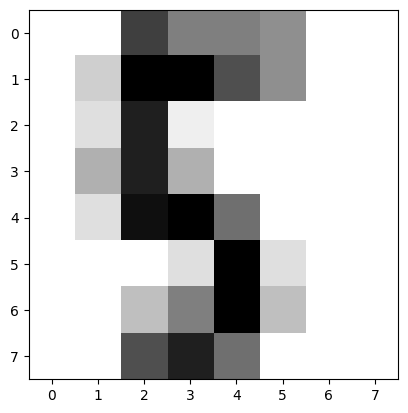

In [3]:
# Show single digit
plt.imshow(X_train[25].reshape(8,8), cmap='binary')
plt.show()

# Clustering stage

### KMeans

In [4]:
# Create KMeans cluster object
k_num_clusters = 50
kmeans = KMeans(n_clusters=k_num_clusters, n_init="auto", random_state=42)

# Group similar digits into clusters
K_X_digits_dist = kmeans.fit_transform(X_train)

# Fit the Agglomerative Clustering model to X_train
K_cluster_labels = kmeans.labels_

# Get the index of the closest digit to the center of each cluster
K_representative_digits_idx = K_X_digits_dist.argmin(axis=0)

# Store the closest digits in a separated variable
K_X_representative_digits = X_train[K_representative_digits_idx]

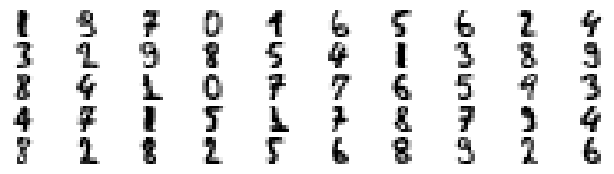

In [5]:
# Show the closest digits
plt.figure(figsize=(8,2))
for index, K_X_representative_digit in enumerate(K_X_representative_digits):
  plt.subplot(k_num_clusters//10, 10, index+1)
  plt.imshow(K_X_representative_digit.reshape(8,8), cmap='binary')
  plt.axis("off")
plt.show()

In [6]:
# Manualy label each of the 50 digits
K_y_representative_digits = np.array([
    1, 9, 7, 0, 1, 6, 5, 6, 2, 4,
    3, 2, 9, 8, 5, 4, 1, 3, 8, 9,
    8, 4, 1, 0, 7, 7, 6, 5, 9, 3,
    4, 7, 1, 5, 1, 7, 8, 7, 9, 4,
    8, 2, 8, 2, 5, 6, 8, 9, 2, 6
])

# Check to see if you are correct using the original labels
K_y_representative_digits == y_train[K_representative_digits_idx]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [7]:
# give each digit of a cluster the oru label of that cluster
K_y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k_num_clusters):
  K_y_train_propagated[K_cluster_labels == i] = K_y_representative_digits[i]

In [8]:
# Remove digits on the borders of clusters
percentile_closest = 95

K_X_cluster_dist = K_X_digits_dist[np.arange(len(X_train)), K_cluster_labels]
for i in range(k_num_clusters):
  in_cluster = (K_cluster_labels == i)
  cluster_dist = K_X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (K_X_cluster_dist > cutoff_distance)
  K_X_cluster_dist[in_cluster & above_cutoff] = -1

K_partially_propagated = (K_X_cluster_dist != -1)
K_X_train_partially_propagated = X_train[K_partially_propagated]
K_y_train_partially_propagated = K_y_train_propagated[K_partially_propagated]
print(len(K_y_train_partially_propagated))

1309


In [9]:
# Percentage of digits receive the correct label
(K_y_train_partially_propagated == y_train[K_partially_propagated]).mean()

0.959511077158136

## Agglomerative Clustering

In [10]:
# Create cluster object
num_clusters = 50
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters, compute_distances=True)

# Fit the Agglomerative Clustering model to X_train
cluster_labels = agg_cluster.fit_predict(X_train)

# Initialize a dictionary to store representative digit indexes for each cluster
representative_digits_idx = {i: None for i in range(num_clusters)}

# Initialize X_cluster_dist as a list to store distances of digits tp their centers
X_cluster_dist = np.empty(len(X_train), dtype=np.float64)

# Find the index of the closest digit to the center of each cluster
for cluster_idx in range(num_clusters):
    cluster_mask = (cluster_labels == cluster_idx)
    cluster_X = X_train[cluster_mask]
    cluster_center = cluster_X.mean(axis=0) #

    distances_to_center = np.linalg.norm(cluster_X - cluster_center, axis=1)
    cluster_indices = np.where(cluster_mask)[0]
    X_cluster_dist[cluster_indices] = distances_to_center

    center_idx = ((cluster_X - cluster_center) ** 2).sum(axis=1).argmin()
    representative_digits_idx[cluster_idx] = np.where(cluster_mask)[0][center_idx]

# Get the indexes of representative digits
representative_digits_idx = list(representative_digits_idx.values())

# Extract representative digits from X_train using representative_digits_idx
X_representative_digits = X_train[representative_digits_idx]

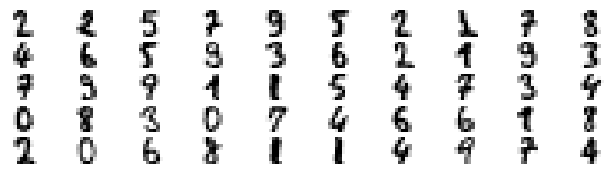

In [11]:
# Show the closest digits
plt.figure(figsize=(8,2))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(num_clusters//10, 10, index+1)
  plt.imshow(X_representative_digit.reshape(8,8), cmap='binary')
  plt.axis("off")
plt.show()

In [12]:
# Manualy label each of the 50 digits
y_representative_digits = np.array([
    2, 2, 5, 7, 9, 5, 2, 1, 7, 8,
    4, 6, 5, 9, 3, 6, 2, 1, 9, 3,
    7, 9, 9, 1, 1, 5, 4, 7, 3, 4,
    0, 8, 3, 0, 7, 4, 6, 6, 1, 8,
    2, 0, 6, 8, 1, 1, 4, 9, 7, 4
])

# Check to see if you are correct using the original labels
y_representative_digits == y_train[representative_digits_idx]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [13]:
# give each digit of a cluster the oru label of that cluster
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(num_clusters):
  y_train_propagated[cluster_labels == i] = y_representative_digits[i]

In [14]:
# Remove digits on the borders of clusters
percentile_closest = 95

# X_cluster_dist was already create in a previous code block
for i in range(num_clusters):
  in_cluster = (cluster_labels == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
print(len(y_train_partially_propagated))

1306


In [15]:
# Percentage of digits receive the correct label
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9701378254211332

# Testing stage

### Logistic Regression with the Original Labels

In [16]:
# Train logistic regression with the first 50 values (original labels)

n_labeled = 50
log_reg_first = LogisticRegression(max_iter=10_000)
log_reg_first.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg_first.score(X_test, y_test)

0.7481108312342569

In [17]:
# Train logistic regression with only all values (original labels)

log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.906801007556675

### KMeans

In [18]:
# Train logistic regression with the best 50 values (our labels)

log_reg_chosen = LogisticRegression(max_iter=10_000)
log_reg_chosen.fit(K_X_representative_digits, K_y_representative_digits)
log_reg_chosen.score(X_test, y_test)

0.8639798488664987

In [19]:
# Train logistic regression with all values (our labels, after they were propagated)

log_reg_prop = LogisticRegression(max_iter=10_000)
log_reg_prop.fit(X_train, K_y_train_propagated)
log_reg_prop.score(X_test, y_test)

0.8765743073047859

In [20]:
# Train logistic regression without the bad values (our labels, after they were propagated)

log_reg_par_prop = LogisticRegression(max_iter=10_000)
log_reg_par_prop.fit(K_X_train_partially_propagated, K_y_train_partially_propagated)
log_reg_par_prop.score(X_test, y_test)

0.8816120906801007

## Agglomerative Clustering

In [21]:
# Train logistic regression with the best 50 values (our labels)

log_reg_chosen = LogisticRegression(max_iter=10_000)
log_reg_chosen.fit(X_representative_digits, y_representative_digits)
log_reg_chosen.score(X_test, y_test)

0.818639798488665

In [22]:
# Train logistic regression with all values (our labels, after they were propagated)

log_reg_prop = LogisticRegression(max_iter=10_000)
log_reg_prop.fit(X_train, y_train_propagated)
log_reg_prop.score(X_test, y_test)

0.8639798488664987

In [23]:
# Train logistic regression without the bad values (our labels, after they were propagated)

log_reg_par_prop = LogisticRegression(max_iter=10_000)
log_reg_par_prop.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg_par_prop.score(X_test, y_test)

0.8488664987405542